# Lab 3 Part 2 - Task 1: Parameters in CNN (5 Marks)

- For the model we have created in **Lab 3 Part 1 Exercise**: Early Stopping with Callbacks, calculate the number of parameters by hand for each layer and compare to the output of model.summary() and print the model summary.
- Then print the model summary of **Exercise 7 in Lab 1**
- Now compare the Model you created in **Exercise 7 in Lab 1**,
  - Compare the Parameters of the models

  - Compare Model Performance







In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

In [2]:
# Importing the data
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
print('Shape:', train_data[0].shape)
print('Train Labels', train_labels[:10])

Shape: (28, 28)
Train Labels [5 0 4 1 9 2 1 3 1 4]


In [3]:
# Using the first 10,000 samples of our training data as our validation set
val_data, val_labels = train_data[:10000], train_labels[:10000]

# Using the remainder of the original training data for actual training
partial_train_data, partial_train_labels = train_data[10000:], train_labels[10000:]

In [4]:
# Scaling pixel values so they lie in the range of 0-1
partial_train_data = partial_train_data / 255.
val_data = val_data / 255.
test_data = test_data /255.

In [9]:
partial_train_data = np.expand_dims(partial_train_data, axis=3)
val_data = np.expand_dims(val_data, axis=3)
test_data = np.expand_dims(test_data, axis=3)

In [10]:
partial_train_labels = to_categorical(partial_train_labels)
val_labels = to_categorical(val_labels)
test_labels = to_categorical(test_labels)

In [11]:
# Defining the early stopping callback
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Creating and compiling the model (use your modified model)
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), strides=1, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=2, padding='valid', activation='relu'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding='valid', activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Fitting the model with the complete training set and use early stopping
history3 = model3.fit(
    partial_train_data,
    partial_train_labels,
    epochs=20,
    batch_size=256,
    validation_data=(val_data, val_labels),
    callbacks=[callback],  # Include early stopping
    verbose=1  # Set verbose to 0 to avoid printing progress for each epoch
)

Epoch 1/20
196/196 [==============================] - 44s 218ms/step - loss: 0.2539 - accuracy: 0.9216 - val_loss: 0.1140 - val_accuracy: 0.9656
Epoch 2/20
196/196 [==============================] - 46s 237ms/step - loss: 0.0525 - accuracy: 0.9837 - val_loss: 0.0541 - val_accuracy: 0.9834
Epoch 3/20
196/196 [==============================] - 51s 258ms/step - loss: 0.0305 - accuracy: 0.9905 - val_loss: 0.0642 - val_accuracy: 0.9834
Epoch 4/20
196/196 [==============================] - 53s 269ms/step - loss: 0.0201 - accuracy: 0.9938 - val_loss: 0.0479 - val_accuracy: 0.9882
Epoch 5/20
196/196 [==============================] - 55s 281ms/step - loss: 0.0142 - accuracy: 0.9955 - val_loss: 0.0562 - val_accuracy: 0.9871
Epoch 6/20
196/196 [==============================] - 61s 311ms/step - loss: 0.0105 - accuracy: 0.9969 - val_loss: 0.0425 - val_accuracy: 0.9898
Epoch 7/20
196/196 [==============================] - 59s 299ms/step - loss: 0.0078 - accuracy: 0.9973 - val_loss: 0.0506 - val_ac

In [14]:
# Evaluating the trained model on the test data
test_loss, test_accuracy = model3.evaluate(test_data, test_labels)

# Print test loss and accuracy
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

313/313 [==============================] - 7s 22ms/step - loss: 0.0452 - accuracy: 0.9899
Test Loss: 0.045239247381687164
Test Accuracy: 0.9898999929428101


In [15]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 15488)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               1982592   
                                                                 
 dense_3 (Dense)             (None, 10)               

In [34]:
# Calculating the shapes by hand - Lab 3 Part 1
layer1 = np.array([28,28,16]) #padding is same so the output height and width is the same of input, just the filter number is added
layer2 = np.array([np.floor((((28+(2*0)-3)/2)+1)),np.floor((((28+(2*0)-3)/2)+1)),32])
layer3 = layer2 + np.array([0,0,(64-32)])#padding is same so the output height and width is the same of previous layer, just the filter number changes
layer4 = np.array([np.floor((((13+(2*0)-3)/1)+1)),np.floor((((13+(2*0)-3)/1)+1)),128])

In [35]:
# Exhibting the shapes calculated by hand - Lab 3 Part 1
print(f'Layer 1: {layer1}')
print(f'Layer 2: {layer2}')
print(f'Layer 3: {layer3}')
print(f'Layer 4: {layer4}')

Layer 1: [28 28 16]
Layer 2: [13. 13. 32.]
Layer 3: [13. 13. 64.]
Layer 4: [ 11.  11. 128.]


In [ ]:
# Calculating the parameters by hand - Lab 3 Part 1
layer1p = (3*3*16)+16
layer2p = ((3*3*16)+1)*32
layer3p = ((3*3*32)+1)*64
layer4p = ((3*3*64)+1)*128

In [ ]:
# Exhibting the parameters calculated by hand - Lab 3 Part 1
print(f'Layer 1: {layer1p}')
print(f'Layer 2: {layer2p}')
print(f'Layer 3: {layer3p}')
print(f'Layer 4: {layer4p}')

In [36]:
# Summary for Lab 1 - Exercise 7
network8 = Sequential()
network8.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
network8.add(Dense(64, activation='sigmoid'))
network8.add(Dense(10, activation='softmax'))
network8.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
Total params: 435402 (1.66 MB)
Trainable params: 435402 (1.66 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The accuracy of model created in Lab 1 - Exercise 7 is:
New test accuracy: 0.9829999804496765

##### Comparing the models:
The model we created in Lab 3 part 1 using convolution layers has more then 2 million parameters, this is almost 5 times the number of parameters we had for the model we created in Lab 1 exercise 7 using only dense layers. However, the accuracy of the model in Lab 3 is higher, achieving 98,98% against 98.29% from the pervious model.

# Lab 3 Part 2 - Task 2: CIFAR-10 Challenge (10 Marks)

In this lab you will experiment with whatever ConvNet architecture/design you'd like on [CIFAR-10 image dataset](https://www.cs.toronto.edu/~kriz/cifar.html).


## Exercise  1: Creating the network

**Goal:** After training, your model should achieve **at least 80%** accuracy on a **validation** set within 20 epochs. (Or as close as possible as long as there is demonstrated effort to achieve this goal.)

**Data split** The training set should consist of 40000 images, the validation set should consist of 10000 images, and the test set should consist of the remaining 10000 images. **Please use the Keras `load_data()` function to import the data set.**


### Some things you can try:
- Different number/type of layers
- Different filter sizes
- Adjust the number of filters used in any given layer
- Try various pooling strategies
- Consider using batch normalization
- Check if adding regularization helps
- Consider alternative optimizers
- Try different activation functions


### Tips for training
When building/tuning your model, keep in mind the following points:

- This is experimental, so be driven by results achieved on the validation set as opposed to what you have heard/read works well or doesn't
- If the hyperparameters are working well, you should see improvement in the loss/accuracy within approximately one epoch
- For hyperparameter tuning: start by testing a large range of hyperparameters for just a few training iterations to find the combinations of parameters that are working at all
- Once you have found some sets of hyperparameters that seem to work, search more finely around these parameters. You may need to train for more epochs.
- Prefer random search to grid search for hyperparameters
- You should use the validation set for hyperparameter search and for evaluating different architectures
- The test set should only be used at the very end to evaluate your final model


In [5]:
# Accessing the images
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.cifar10.load_data()
print('Shape:', train_data[0].shape)
print('Train Labels', train_labels[:10])

Shape: (32, 32, 3)
Train Labels [[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


In [6]:
# Using the first 10,000 samples of our training data as our validation set
val_data, val_labels = train_data[:10000], train_labels[:10000]

# Using 40,000 of the original training data for actual training
partial_train_data, partial_train_labels = train_data[10000:50000], train_labels[10000:50000]

In [7]:
# Scaling pixel values so they lie in the range of 0-1
partial_train_data = partial_train_data / 255.
val_data = val_data / 255.
test_data = test_data /255.

In [8]:
print(partial_train_data.shape)
print(val_data.shape)
print(test_data.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [9]:
# Adjusting the data labels
partial_train_labels = to_categorical(partial_train_labels)
val_labels = to_categorical(val_labels)
test_labels = to_categorical(test_labels)

In [12]:
# Model

model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu', padding='same'))
# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layer
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Conv2D(filters=128, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))


In [13]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
history = model.fit(partial_train_data,
                    partial_train_labels,
                    epochs=16,
                    batch_size=256,
                    validation_data=(val_data, val_labels),
                    verbose=1)

Epoch 1/20
157/157 [==============================] - 346s 2s/step - loss: 2.1678 - accuracy: 0.2028 - val_loss: 1.9408 - val_accuracy: 0.2904
Epoch 2/20
157/157 [==============================] - 349s 2s/step - loss: 1.8091 - accuracy: 0.3458 - val_loss: 1.6245 - val_accuracy: 0.3929
Epoch 3/20
157/157 [==============================] - 336s 2s/step - loss: 1.5644 - accuracy: 0.4292 - val_loss: 1.4701 - val_accuracy: 0.4764
Epoch 4/20
157/157 [==============================] - 908s 6s/step - loss: 1.4160 - accuracy: 0.4889 - val_loss: 1.2261 - val_accuracy: 0.5527
Epoch 5/20
157/157 [==============================] - 315s 2s/step - loss: 1.3004 - accuracy: 0.5359 - val_loss: 1.1656 - val_accuracy: 0.6027
Epoch 6/20
157/157 [==============================] - 1363s 9s/step - loss: 1.1744 - accuracy: 0.5839 - val_loss: 1.1313 - val_accuracy: 0.5983
Epoch 7/20
157/157 [==============================] - 1321s 8s/step - loss: 1.0873 - accuracy: 0.6187 - val_loss: 1.0138 - val_accuracy: 0.64

In [15]:
# Evaluating the trained model on the test data
test_loss, test_accuracy = model.evaluate(test_data, test_labels)

# Print test loss and accuracy
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

313/313 [==============================] - 26s 81ms/step - loss: 0.8809 - accuracy: 0.7281
Test Loss: 0.880940318107605
Test Accuracy: 0.7281000018119812


## Exercise 2: Describe What you did

All the work you did leading up to your final model should be summarized in this section. This should be a logical and well-organized summary of the various experiments that were tried in **Lab 3 Part 2 - Task 2:Exercise 1**, and should be captured in **table format**. Upon reading this section I should understand what you tried, the reasoning behind trying it, any quantitative values that correspond to what you tried, and the results.

See [this guide](https://www.datacamp.com/community/tutorials/markdown-in-jupyter-notebook) for how to format markdown cells in Jupyter notebooks.

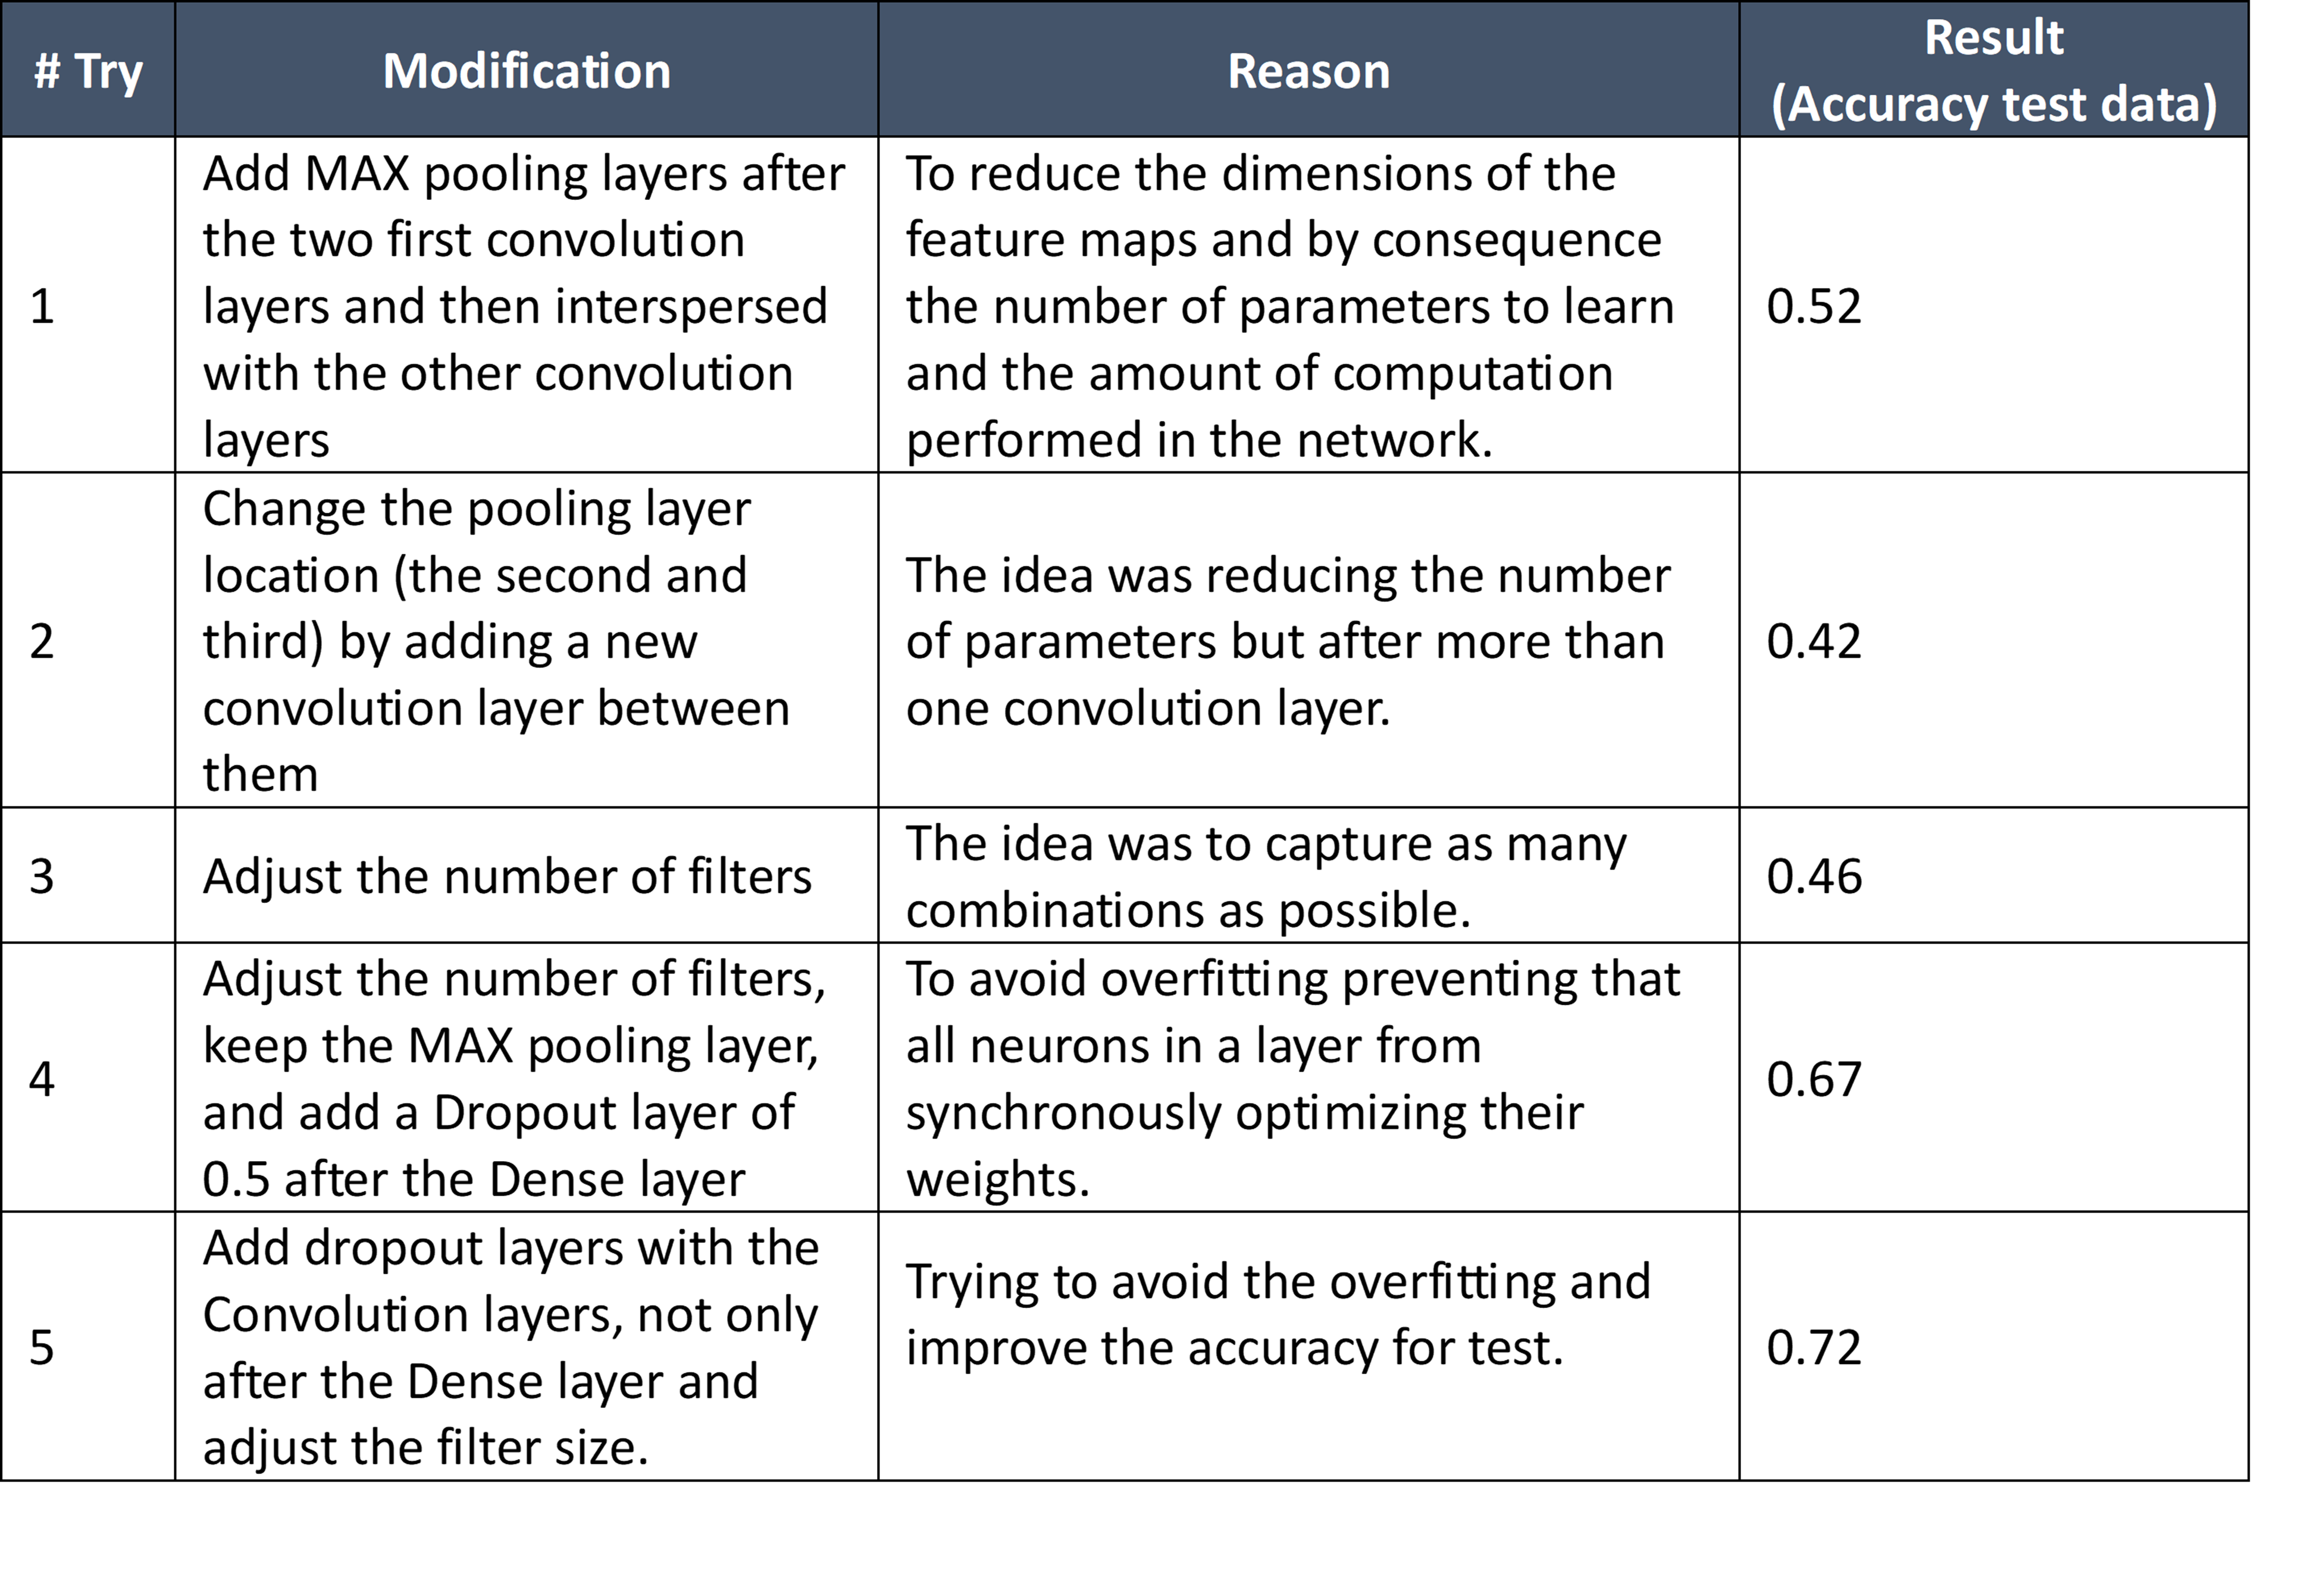